# **Análisis exploratorio inicial de los conjuntos de Proteínas Moonlighting y No Moonlighting**





## Montaje de Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Carga de datos e importación de librerías

In [ ]:
# Importamos las librerías necesarias.
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import seaborn as sns

# Cargamos todos los datasets necesarios para el análisis.
moon_dataset = pd.read_csv('/content/drive/My Drive/moon_stats_dataset.csv')      # Datos de Proteínas Moonlighting
no_moon_dataset = pd.read_csv('/content/drive/My Drive/top700_stats_dataset.csv')  # Datos de Proteínas No Moonlighting

## Análisis descriptivo básico
Contamos el número total de proteínas y las proteínas con entradas en PDB en cada conjunto, además de analizar la diversidad de organismos.


In [ ]:
def describir_proteinas(df):
    num_proteinas = len(df)
    num_organismos = df['Organism Name'].nunique()
    num_proteinas_pdb = df['PDB ID'].apply(lambda x: pd.notna(x) and x != '').sum()
    return num_proteinas, num_organismos, num_proteinas_pdb

print("Proteínas Moonlighting:")
print("Número total de proteínas, Número de organismos diferentes, Número de proteínas con entradas PDB:", describir_proteinas(moon_dataset))
print("Proteínas No Monlighting:")
print("Número total de proteínas, Número de organismos diferentes, Número de proteínas con entradas PDB:", describir_proteinas(no_moon_dataset))

Proteínas Moonlighting:
Número total de proteínas, Número de organismos diferentes, Número de proteínas con entradas PDB: (561, 55, 403)
Proteínas No Monlighting:
Número total de proteínas, Número de organismos diferentes, Número de proteínas con entradas PDB: (700, 93, 700)


## Calculo de tamaño de las proteínas
Determinamos la cantidad de aminoácidos para cada tipo de proteína y reorganizamos las columnas para mejorar la visualización.

In [ ]:
# Añadimos y calculamos la columna de tamaño de proteínas.
moon_dataset['Protein Size'] = moon_dataset['Amino Acid Sequence'].apply(len)
no_moon_dataset['Protein Size'] = no_moon_dataset['Amino Acid Sequence'].apply(len)

# Reordenamos columnas para mejorar la legibilidad.
ordered_columns = ['UniProt IDs', 'PDB ID', 'Gene Name', 'Protein Name', 'Amino Acid Sequence', 'Protein Size', 'Organism Name', 'Status', 'Protein Existence', 'GO BP Terms', 'GO CC Terms', 'GO MF Terms', 'Max_MBL_CC', 'CC_Pairs_Max_MBL', 'Max_MBL_MF', 'MF_Pairs_Max_MBL', 'Highest_MBL', 'Class']
moon_dataset = moon_dataset[ordered_columns]
no_moon_dataset = no_moon_dataset[ordered_columns]

# Visualizamos de las primeras filas de los DataFrames.
moon_dataset.head()
no_moon_dataset.head()

,UniProt IDs,PDB ID,Gene Name,Protein Name,Amino Acid Sequence,Protein Size,Organism Name,Status,Protein Existence,GO BP Terms,GO CC Terms,GO MF Terms,Max_MBL_CC,CC_Pairs_Max_MBL,Max_MBL_MF,MF_Pairs_Max_MBL,Highest_MBL,Class
0,O22793,5YDG,{'Name': 'MORF2 {ECO:0000303|PubMed:22411807}'...,"Multiple organellar RNA editing factor 2, chlo...",MALPLSGTRHLTRALLSNVTLMAPPRIPSSVHYGGSRLGCSTRFFS...,219,Arabidopsis thaliana (Mouse-ear cress).,Reviewed,1,GO:0016554 - cytidine to uridine editing; GO:0...,GO:0009507 - chloroplast; GO:0005783 - endopla...,GO:0046983 - protein dimerization activity; GO...,0.0,No data,1.0,"[('GO:0046983', 'GO:0042803')]",1.0,False
1,G8JZS6,4FE9,"{'Name': 'susF', 'OrderedLocusNames': ['BT_369...",Outer membrane protein SusF,MKKHLIYTGMFLAAIGFSACNEDFKDWADPQSNPQEESAGQLTATF...,485,Bacteroides thetaiotaomicron (strain ATCC 2914...,Reviewed,1,GO:0005983 - starch catabolic process; GO:0005...,GO:0009279 - cell outer membrane; GO:0019867 -...,GO:2001070 - starch binding,1.0,"[('GO:0009279', 'GO:0019867')]",0.0,No data,1.0,False
2,G1FNI6,5A10; 5A11,{'Name': 'TFP {ECO:0000303|PubMed:21783213}'},N-(sulfonatooxy)prop-2-enimidothioate sulfolya...,MARTLQGEWMKVEQKGGQVPAPRSSHGIAVIGDKLYCFGGEDPPYE...,348,Thlaspi arvense (Field penny-cress).,Reviewed,1,GO:0019760 - glucosinolate metabolic process; ...,GO:0005829 - cytosol; GO:0005634 - nucleus,GO:0030234 - enzyme regulator activity; GO:004...,0.0,No data,1.0,"[('GO:0042802', 'GO:0042803')]",1.0,False
3,C0LGW6,5XJO; 5XJX; 5XKJ,"{'Name': 'ERL1 {ECO:0000303|PubMed:14985254}',...",LRR receptor-like serine/threonine-protein kin...,MKEKMQRMVLSLAMVGFMVFGVASAMNNEGKALMAIKGSFSNLVNM...,966,Arabidopsis thaliana (Mouse-ear cress).,Reviewed,1,GO:0009553 - embryo sac development; GO:001631...,GO:0016020 - membrane; GO:0005886 - plasma mem...,GO:0005524 - ATP binding; GO:0106310 - protein...,0.0,No data,1.0,"[('GO:0033612', 'GO:0005102')]",1.0,False
4,C0HLV2,7ZU8; 7ZVA; 7ZVB; 7ZVC,NaN,Protein neprosin {ECO:0000303|PubMed:27481162},MQAKFFTFVILSSVFYFNYPLAEARSIQARLANKPKGTIKTIKGDD...,380,Nepenthes x ventrata (Red tropical pitcher pla...,Reviewed,1,GO:0006508 - proteolysis,GO:0005576 - extracellular region,GO:0004175 - endopeptidase activity; GO:007001...,0.0,No data,1.0,"[('GO:0004175', 'GO:0070012')]",1.0,False


## Visualización de los datos de Proteínas Moonlighting y No Moonlighting

### Distribución de proteínas por organismo

Representamos gráficamente la cantidad de proteínas por organismo para ambos tipos de proteínas.

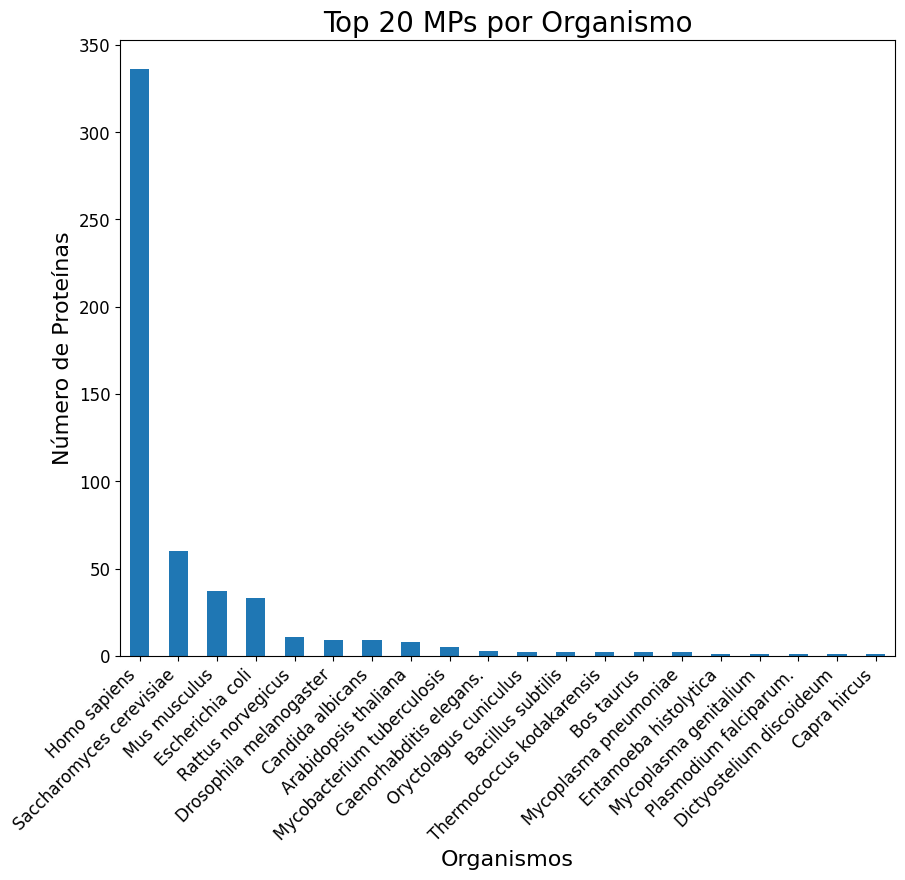

In [ ]:
# Visualizamos la distribución de proteínas por organismo en moon_dataset.
organism_counts = moon_dataset['Organism Name'].value_counts().head(20)

# Modificamos los nombres de los organismos para que solo aparezcan las dos primeras palabras.
modified_organisms = [' '.join(name.split()[:2]) for name in organism_counts.index]

plt.figure(figsize=(10, 8))
organism_counts.index = modified_organisms
organism_counts.plot(kind='bar')

plt.title('Top 20 MPs por Organismo', fontsize=20)
plt.xlabel('Organismos', fontsize=16)
plt.ylabel('Número de Proteínas', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

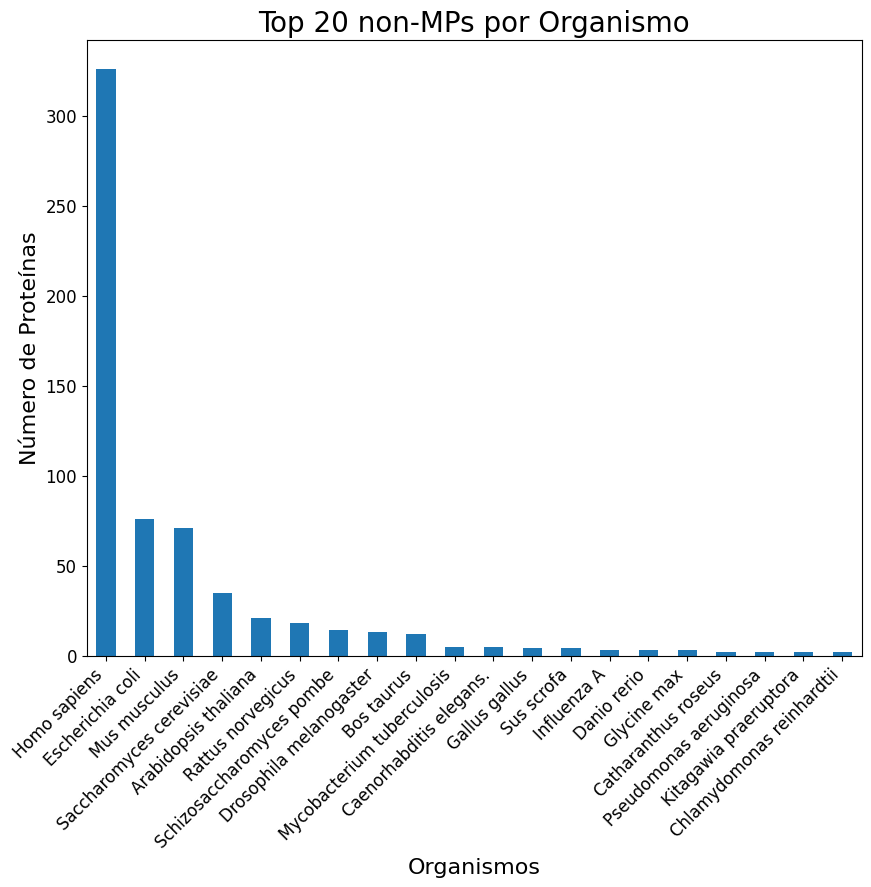

In [ ]:
# Visualizamos la distribución de proteínas por organismo en no_moon_dataset.
organism_counts = no_moon_dataset['Organism Name'].value_counts().head(20)

# Modificamos los nombres de los organismos para que solo aparezcan las dos primeras palabras.
modified_organisms = [' '.join(name.split()[:2]) for name in organism_counts.index]

plt.figure(figsize=(10, 8))
organism_counts.index = modified_organisms
organism_counts.plot(kind='bar')

plt.title('Top 20 non-MPs por Organismo', fontsize=20)
plt.xlabel('Organismos', fontsize=16)
plt.ylabel('Número de Proteínas', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Distribución de la longitud de las secuencias proteicas
Visualizamos la longitud de las proteínas (nº de aminoácidos) de ambos conjuntos de datos.

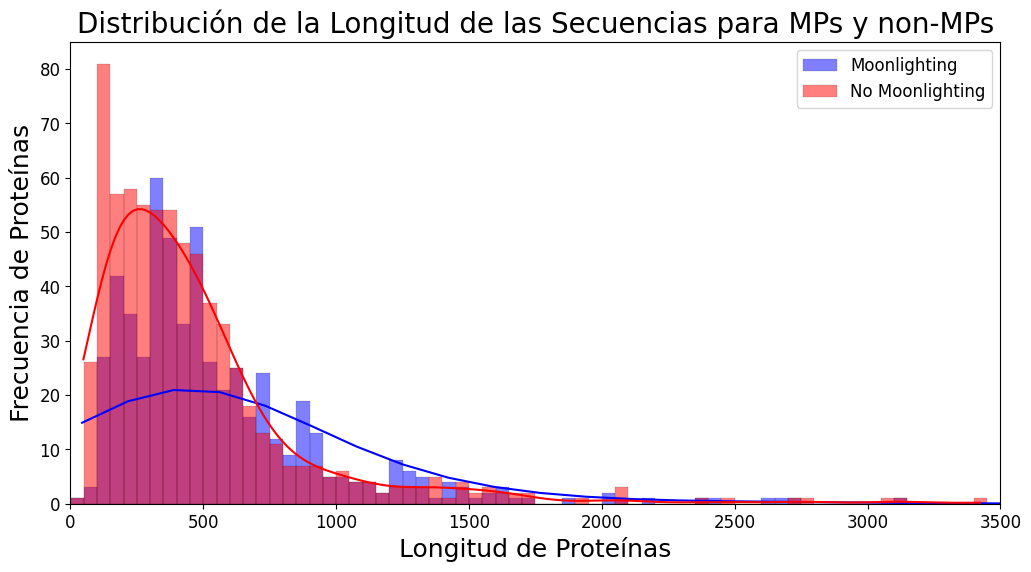

In [ ]:
# Configuración de los histogramas para comparar tamaños de proteínas.
bins = range(0, 3500, 50)
plt.figure(figsize=(12, 6))
sns.histplot(moon_dataset['Protein Size'], bins=bins, color='blue', label='Moonlighting', kde=True, alpha=0.5)
sns.histplot(no_moon_dataset['Protein Size'], bins=bins, color='red', label='No Moonlighting', kde=True, alpha=0.5)

plt.title('Distribución de la Longitud de las Secuencias para MPs y non-MPs', fontsize=20)
plt.xlabel('Longitud de Proteínas', fontsize=18)
plt.ylabel('Frecuencia de Proteínas', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.xlim(0, 3500)
plt.show()

## Distribución de la Mayor Distancia Mínima de Rama para MPs y non-MPs
Exploramos la distribución de la mayor Distancia Mínima de Rama entre los términos GO para proteínas moonlighting y no moonlighting. Este análisis proporciona insights sobre las diferencias estructurales y funcionales entre los dos grupos.

<Figure size 1200x800 with 0 Axes>

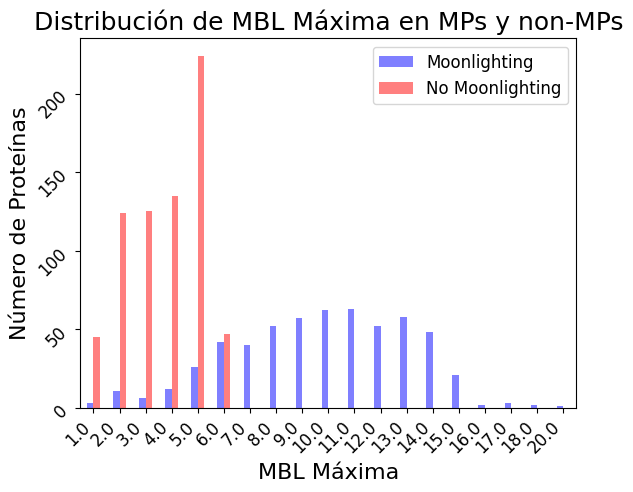

In [ ]:
import matplotlib.pyplot as plt

# Calculamos la frecuencia de las distancias semánticas máximas en el conjunto
# de proteínas moonlighting y no moonlighting.
frec_dist_moon = moon_dataset['Highest_MBL'].value_counts().sort_index()
frec_dist_no_moon = no_moon_dataset['Highest_MBL'].value_counts().sort_index()

# Creamos un DataFrame combinado para facilitar la superposición de las gráficas.
df_combined = pd.DataFrame({
    'Moonlighting': frec_dist_moon,
    'No Moonlighting': frec_dist_no_moon
}).fillna(0)  # Llenar con 0 donde no hay datos

# Visualizamos la distribución de las frecuencias.
plt.figure(figsize=(12, 8))
df_combined.plot(kind='bar', color=['blue', 'red'], alpha=0.5)
plt.title('Distribución de MBL Máxima en MPs y non-MPs', fontsize=18)
plt.xlabel('MBL Máxima', fontsize=16)
plt.ylabel('Número de Proteínas', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=45, ha='right', fontsize=12)
plt.legend(['Moonlighting', 'No Moonlighting'], fontsize=12)
plt.show()

En la primera gráfica, las proteínas moonlighting muestran una distancia semántica máxima entre términos GO en el rango de 6.0 a 15.0, con un pico notable alrededor de 10.0, indicando que sus términos GO son semánticamente distantes, lo que es coherente con su naturaleza multifuncional. En contraste, la segunda gráfica muestra que las proteínas no moonlighting tienen una distancia semántica máxima menor, concentrada entre 2.0 y 5.0, con un pico en 5.0, sugiriendo que sus términos GO están más relacionados semánticamente, reflejando una menor diversidad funcional.